<a href="https://colab.research.google.com/github/NISHANTARORA29/C-Programs-/blob/main/RNNstockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
from tensorflow.keras.layers import Dense ,Input , GRU , LSTM , SimpleRNN , GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')

In [ ]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [ ]:
series = df['close'].values.reshape(-1,1)

In [ ]:
scaler = StandardScaler()
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

In [ ]:
T = 10
D = 1
X =[]
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)



X.shape (1249, 10, 1) Y.shape (1249,)


In [ ]:
 i = Input(shape=(T,1))
 x = LSTM(5)(i)
 x = Dense(1)(x)
 model = Model(i,x)
 model.compile(
     loss = 'mse',
     optimizer = Adam(learning_rate = 0.01),

 )
 r = model.fit(
     X[:-N//2],Y[:-N//2],
     epochs = 10,
     validation_data =(X[-N//2:],Y[-N//2:])
 )

Epoch 1/10
20/20 [==============================] - 3s 34ms/step - loss: 0.2988 - val_loss: 0.9777
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0944 - val_loss: 0.5697
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0436 - val_loss: 0.2745
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0200 - val_loss: 0.1359
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0118 - val_loss: 0.0836
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0091 - val_loss: 0.0674
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0081 - val_loss: 0.0659
Epoch 8/10
20/20 [==============================] - 0s 9ms/step - loss: 0.0081 - val_loss: 0.0569
Epoch 9/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0071 - val_loss: 0.0527
Epoch 10/10
20/20 [==============================] - 0s 11ms/step - loss: 0.0075 - val_loss: 0.0488


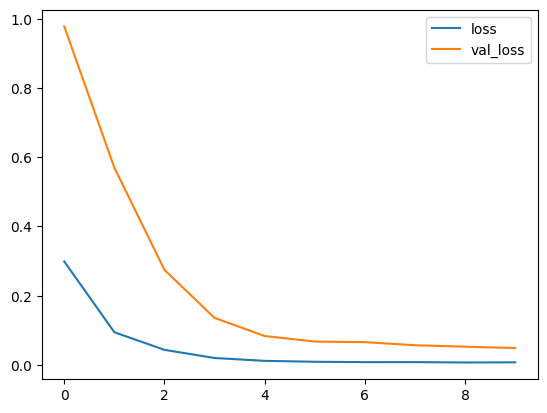

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label ='val_loss' )
plt.legend()

In [ ]:
output = model.predict(X)

40/40 [==============================] - 1s 3ms/step


In [ ]:
output

array([[-1.6394649],
       [-1.6399428],
       [-1.6504394],
       ...,
       [ 2.535198 ],
       [ 2.4616554],
       [ 2.4538705]], dtype=float32)

In [ ]:
print(output.shape)


(1249, 1)


In [ ]:
predictions = output[:,0]

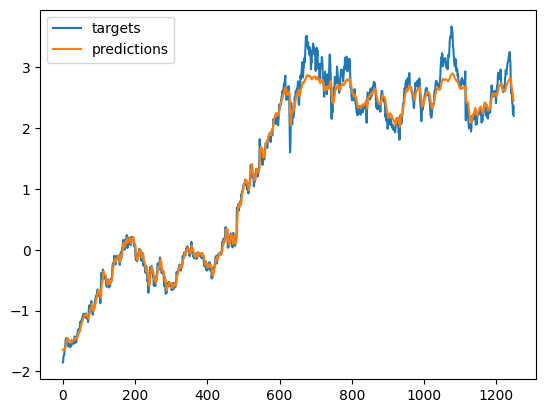

In [ ]:
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()


In [ ]:
validation_target  = Y[-N//2:]
validation_predictions = []
last_x = X[-N//2]
while len(validation_predictions)<len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

1/1 [==============================] - 0s 20ms/step


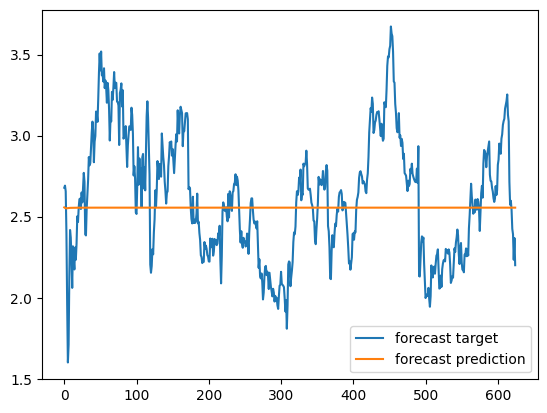

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
df['PrevClose'] = df['close'].shift(1)

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,PrevClose
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [ ]:
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']

In [ ]:
df.head ()


,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


<Axes: >

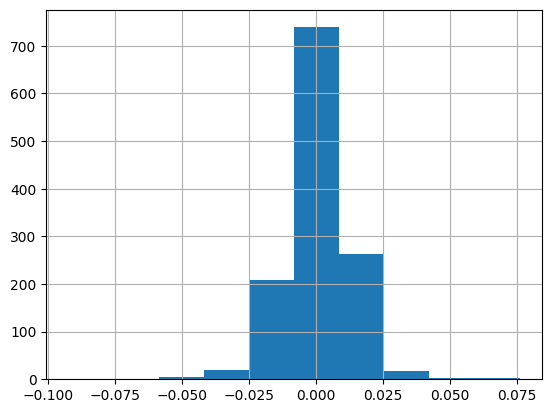

In [ ]:
df['Return'].hist()

In [ ]:
series = df['Return'].values[1:].reshape(-1, 1)

# Normalize the data
# Note: I didn't think about where the true boundary is, this is just approx.
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()


In [ ]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


This code snippet appears to be preparing data for a time series prediction task using a sliding window approach. Let me explain what each part of the code does:

1. **Initialization**: It initializes variables `T` and `D`, where `T` is the number of time steps to use as input features, and `D` represents the number of features per time step.

2. **Data Preparation Loop**: It loops through the time series data to create input-output pairs for the prediction task. For each time step `t`, it creates an input sequence `x` of length `T` starting from `t`, and the corresponding output `y` is the value at time step `t+T`.

3. **Appending to Lists**: It appends each input sequence `x` and corresponding output `y` to lists `X` and `Y`, respectively.

4. **Reshaping**: It converts the lists `X` and `Y` into numpy arrays and reshapes the input data `X` to have dimensions `(N, T, D)`, where `N` is the number of samples, `T` is the number of time steps, and `D` is the number of features per time step. Reshaping is done to match the input format expected by many deep learning libraries, such as TensorFlow and PyTorch.

5. **Print Shape Information**: It prints the shapes of input (`X`) and output (`Y`) arrays.

This process effectively prepares the time series data into input-output pairs suitable for training a deep learning model, where each input sequence consists of `T` time steps with `D` features per time step, and the corresponding output is the value at the next time step.

In [ ]:
i = Input(shape=(T, 1))
x = LSTM(6)(i)
x = Dense(3)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(learning_rate=0.01),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=10,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/10
20/20 [==============================] - 3s 34ms/step - loss: 0.9972 - val_loss: 1.1387
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.9881 - val_loss: 1.1381
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.9876 - val_loss: 1.1452
Epoch 4/10
20/20 [==============================] - 0s 11ms/step - loss: 0.9851 - val_loss: 1.1451
Epoch 5/10
20/20 [==============================] - 0s 11ms/step - loss: 0.9870 - val_loss: 1.1490
Epoch 6/10
20/20 [==============================] - 0s 11ms/step - loss: 0.9825 - val_loss: 1.1527
Epoch 7/10
20/20 [==============================] - 0s 10ms/step - loss: 0.9831 - val_loss: 1.1534
Epoch 8/10
20/20 [==============================] - 0s 11ms/step - loss: 0.9830 - val_loss: 1.1601
Epoch 9/10
20/20 [==============================] - 0s 10ms/step - loss: 0.9805 - val_loss: 1.1533
Epoch 10/10
20/20 [==============================] - 0s 11ms/step - loss: 0.9804 - val_loss: 1.1459



In the code snippet you provided, the validation_data parameter of the fit method is set to (X[-N//2:], Y[-N//2:]).

Let's break down what these values represent:

X[-N//2:]: This represents the input data for validation, consisting of input sequences for the second half of the dataset. It includes all input sequences from the middle of the dataset until the end.

Y[-N//2:]: This represents the corresponding target values for validation, consisting of the target values for the second half of the dataset. It includes all target values from the middle of the dataset until the end.

So, validation_data is a tuple containing validation input data (X) and validation target data (Y) for the second half of the dataset. This allows the model to evaluate its performance on unseen data during training. The model's performance on this validation data can help assess its generalization ability and identify potential overfitting or underfitting issues.






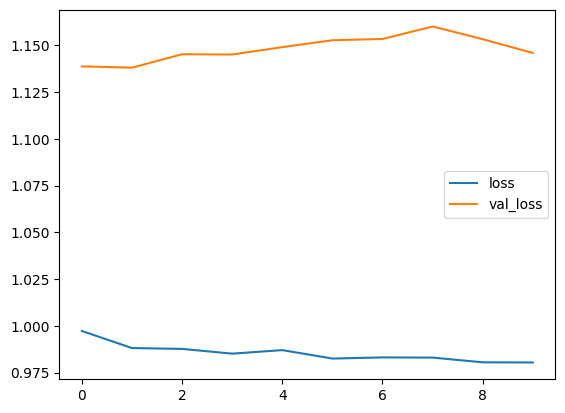

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

39/39 [==============================] - 2s 3ms/step
(1248, 3)


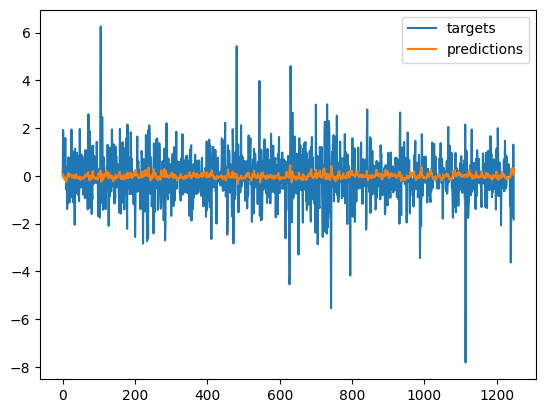

In [ ]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


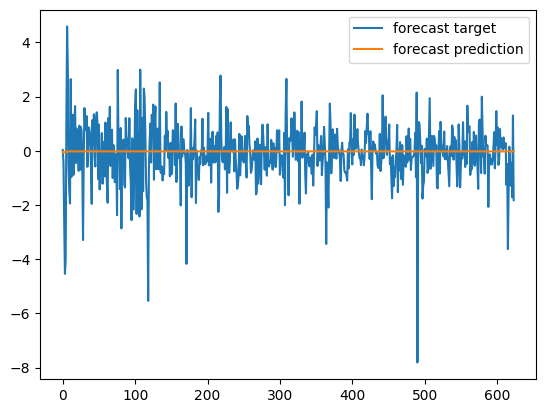

In [ ]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

This code snippet is performing a multi-step forecast using a trained neural network model (presumably an LSTM model) on time series data. Let me break down what each part of the code does:

1. **Initialization**: `validation_target` contains the true values of the target variable for validation, and `validation_predictions` will store the predicted values.

2. **First Validation Input**: `last_x` is initialized with the last input sequence from the validation set (`X[-N//2]`). This sequence is a 1-D array of length `T`.

3. **Forecast Loop**: The loop continues until the length of `validation_predictions` matches the length of `validation_target`. Inside the loop:
   - The model predicts the next value (`p`) based on the last input sequence `last_x`. The input sequence is reshaped to match the model's input shape (`(1, T, 1)`).
   - The predicted value `p` is appended to the `validation_predictions` list.
   - To create the new input sequence for the next prediction, `last_x` is shifted by one time step (`np.roll(last_x, -1)`) to remove the first element, and `p` is added as the last element.

4. **Plotting**: Finally, the true target values (`validation_target`) and the predicted values (`validation_predictions`) are plotted on the same graph using `matplotlib`.

This process essentially iterates through the validation set, making predictions one step at a time, and updating the input sequence for the next prediction by using the previously predicted value. It allows you to see how well the model's predictions align with the actual target values over the validation period.

In [ ]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [ ]:
T = 10 # the number of time steps to look at to make a prediction for the next day
D = input_data.shape[1]
N = len(input_data) - T

In [ ]:
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)

In [ ]:
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [ ]:
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [ ]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(learning_rate=0.001),
  metrics=['accuracy'],
)

In [ ]:
r = model.fit(
  X_train, Y_train,
  batch_size=32,
  epochs=10,
  validation_data=(X_test, Y_test),
)

Epoch 1/10
27/27 [==============================] - 6s 66ms/step - loss: 0.6969 - accuracy: 0.4970 - val_loss: 0.6922 - val_accuracy: 0.5146
Epoch 2/10
27/27 [==============================] - 0s 15ms/step - loss: 0.6939 - accuracy: 0.5173 - val_loss: 0.6967 - val_accuracy: 0.4902
Epoch 3/10
27/27 [==============================] - 0s 12ms/step - loss: 0.6947 - accuracy: 0.5006 - val_loss: 0.6935 - val_accuracy: 0.4951
Epoch 4/10
27/27 [==============================] - 1s 24ms/step - loss: 0.6929 - accuracy: 0.5244 - val_loss: 0.6983 - val_accuracy: 0.4902
Epoch 5/10
27/27 [==============================] - 0s 14ms/step - loss: 0.6935 - accuracy: 0.4970 - val_loss: 0.6913 - val_accuracy: 0.5415
Epoch 6/10
27/27 [==============================] - 0s 15ms/step - loss: 0.6906 - accuracy: 0.5304 - val_loss: 0.6951 - val_accuracy: 0.4927
Epoch 7/10
27/27 [==============================] - 0s 15ms/step - loss: 0.6910 - accuracy: 0.5280 - val_loss: 0.6949 - val_accuracy: 0.4951
Epoch 8/10
27

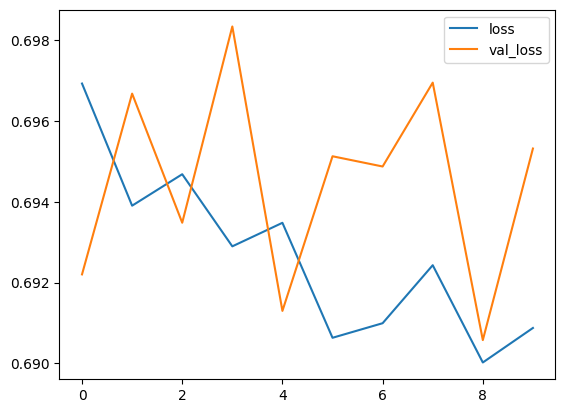

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

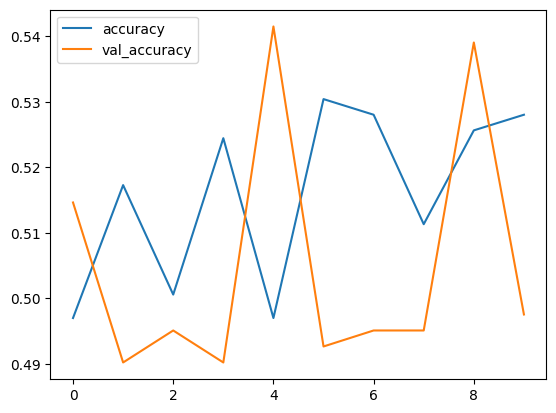

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
